# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. 

Данные содержат следующие атрибуты:
* `'company'` - компания производитель, 
* `'bar_name'` - название шоколадного батончика,
* `'ref'` - номер,
* `'rew_date'` - дата оценки,
* `'percent'` - процент какао бобов,
* `'company_loc'` - местонахождение компании,
* `'rate'` - рейтинг, 
* `'bean_dtype'` - тип какао бобов, 
* `'bean_orig'` - страна происхождения.

## Численные атрибуты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [4]:
!pip install scipy

In [5]:
type(best_bar)
best_bar

,company,bar_name,ref,rew_date,percent,company_loc,rate,bean_dtype,bean_orig
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [6]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через метод `plot()`.

На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией [ядер](https://learnmachinelearning.fandom.com/ru/wiki/%D0%AF%D0%B4%D1%80%D0%B0_(Kernels)), т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют [ядерной оценки плотности](https://learnmachinelearning.fandom.com/ru/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D1%81%D0%B3%D0%BB%D0%B0%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B8_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8#%D0%98%D0%B4%D0%B5%D1%8F_aka_%D0%9A%D1%80%D0%B0%D1%82%D0%BA%D0%BE%D0%B5_%D1%81%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B0%D0%BD%D0%B8%D0%B5) (KDE-kernel density estimate). Строится kde с помощью метода `plot()` с параметром `kind='kde'`.

<AxesSubplot: ylabel='Density'>

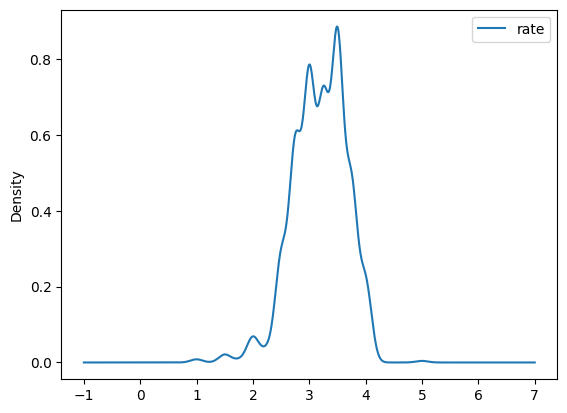

In [7]:
# code here
best_bar.plot(kind='kde')


Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

C:\Users\zeri1\AppData\Local\Temp\ipykernel_25128\3495638021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_bar['percent'] = best_bar2['percent']


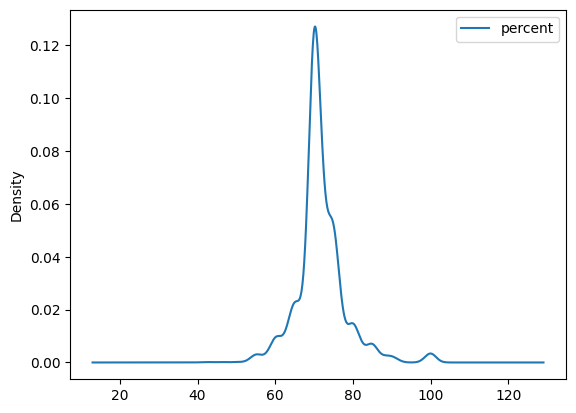

In [8]:
# code here
# best_bar2 = best_bar[['percent']]
best_bar2 = best_bar.loc[:, ['percent']]
best_bar2.percent.dtype
best_bar2 = best_bar2.apply(lambda x: x.str[:-1])
best_bar2 = best_bar2.astype('float')
best_bar2.plot(kind='kde')
best_bar['percent'] = best_bar2['percent']

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод `plot()` для Pandas DataFrame с аргументом `kind='scatter'`. Подпишите картинку.

Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

<AxesSubplot: xlabel='rate', ylabel='percent'>

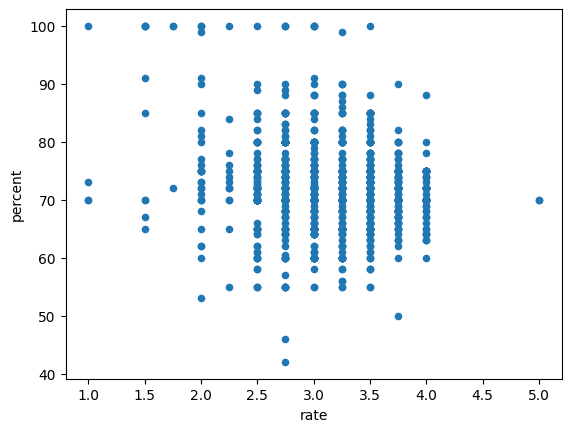

In [9]:
best_bar.plot(kind='scatter',y='percent',x='rate')

Постройте "ящик с усами" для числовых распределений с помощью метода `boxplot`. Возпользуйтесь также методом `describe()` для каждого распределения.

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


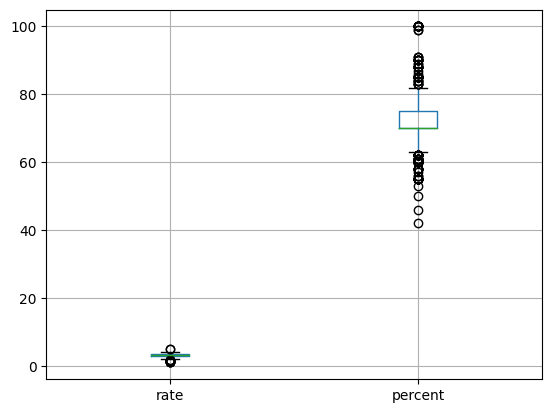

In [10]:
best_bar.boxplot()
best_bar.describe()

In [11]:
best_bar.describe()

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться методом `value_counts()`, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются методы `head()` и `tail()` соответственно.

In [78]:
best_bar['bean_orig'].value_counts()

Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Trinidad, Ecuador          1
Venezuela, Carribean       1
Name: bean_orig, Length: 100, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью метода `plot(kind='bar')`.

<AxesSubplot: >

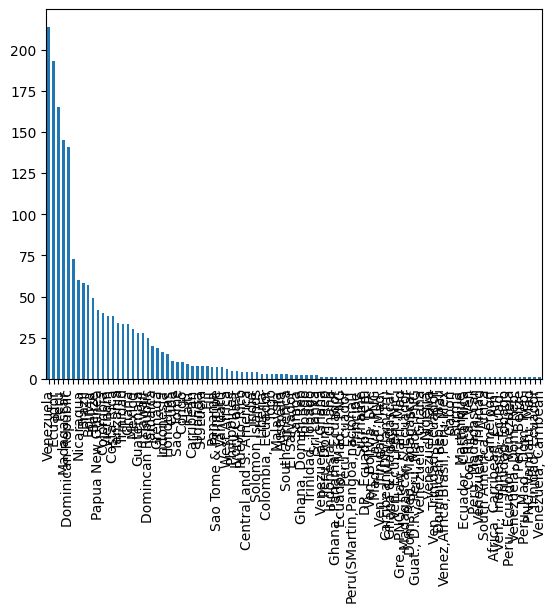

In [79]:
# code here
best_bar['bean_orig'].value_counts().plot(kind='bar')

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. 

В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя метод `dropna()`. Необходимо отметить, что в качестве параметров передается `'axis'`: где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); `'how'`: где `'any`' - удалять строку или столбец, если есть пустой объект, `'all'` - удалять строку или столбец, если все объекты пустые.  

In [80]:
best_bar

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
...,...,...,...,...
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,India
1793,Austria,3.25,62.0,India


In [81]:
# code here
best_bar.dropna(axis=0,how='any')

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
...,...,...,...,...
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,India
1793,Austria,3.25,62.0,India


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута `'bean_orig'` с помощью метода `unique()` и найдите значение пустой записи.

In [82]:
# code here
best_bar['bean_orig'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: `best_bar['bean_orig'] != 'element value'`, которая вернет бинарный массив элементов, где `True` - атрибут объекта не принимает значение `'element value'`, `False` - атрибут объекта принимает значение `'element value'`. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава `'complex'`. Будем считать редковстречающимися, если в выборке их не более 5.

In [83]:
# code here
best_bar['bean_orig'][best_bar['bean_orig'] != '\xa0']


0       Sao Tome
1           Togo
2           Togo
3           Togo
4           Peru
          ...   
1790        Peru
1791       Congo
1792       India
1793       India
1794      Brazil
Name: bean_orig, Length: 1722, dtype: object

Постройте круговую гистограмму распределения для стран производителей какао бобов с помощью функции `pie()`.

<AxesSubplot: ylabel='bean_orig'>

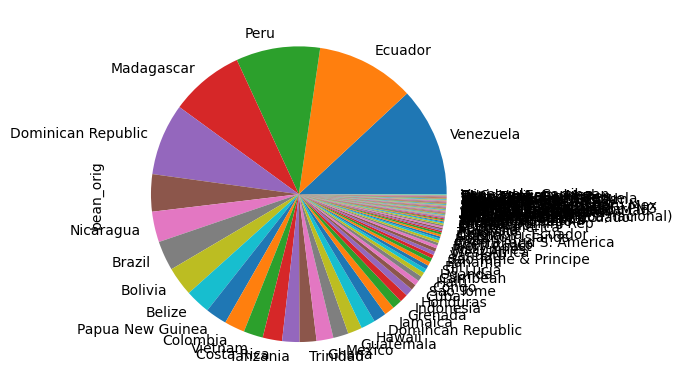

In [84]:
# code here
best_bar['bean_orig'].value_counts().plot(kind='pie')

## Попарные графики распределений

In [85]:
!pip install sklearn

In [86]:
from sklearn import preprocessing
from seaborn import pairplot
from sklearn.preprocessing import LabelEncoder

Построить попарные распределения для всех признаков, включая категориальные признаки.

Для их перевода в "числовые" обозначения используйте объект класса [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) из библиотеки sklearn.

C:\Users\zeri1\AppData\Local\Temp\ipykernel_20044\1021927759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_bar["bean_orig"] = labelencoder1.fit_transform(best_bar["bean_orig"])
C:\Users\zeri1\AppData\Local\Temp\ipykernel_20044\1021927759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_bar["company_loc"] = labelencoder2.fit_transform(best_bar["company_loc"])


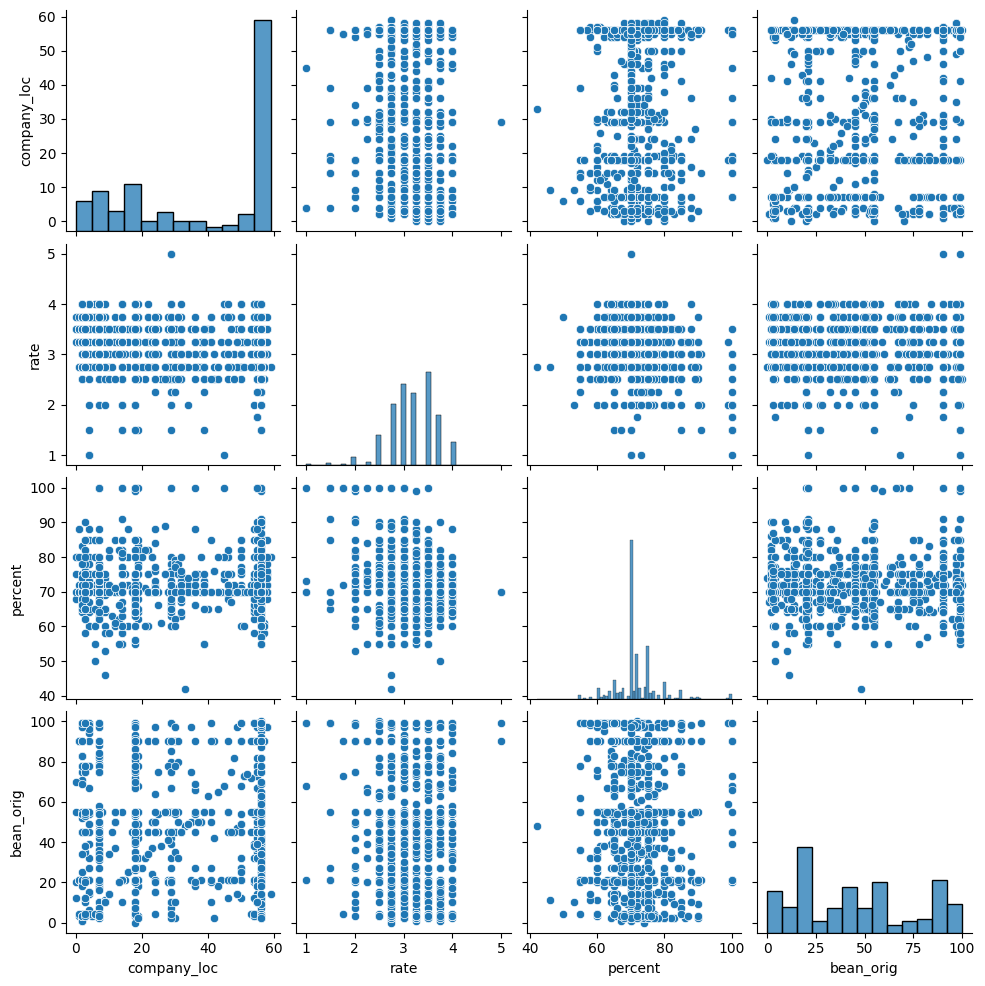

In [87]:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()

best_bar["bean_orig"] = labelencoder1.fit_transform(best_bar["bean_orig"])
best_bar["company_loc"] = labelencoder2.fit_transform(best_bar["company_loc"])

pairplot(best_bar)

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [88]:
rate = best_bar.dropna(how = 'any', axis=0)
rate = rate.set_index('bean_orig')
rate['Meanrate'] = rate.groupby('bean_orig', as_index = True)[['rate']].mean()
rate['Medianrate'] = rate.groupby('bean_orig', as_index = True)[['rate']].median()
rate = rate.groupby('bean_orig', as_index= True)[['Meanrate', 'Medianrate']].mean()
rate = rate.sort_values('Meanrate')

rate

,Meanrate,Medianrate
bean_orig,,
28,2.0,2.0
100,2.5,2.5
95,2.5,2.5
65,2.5,2.5
62,2.5,2.5
...,...,...
17,4.0,4.0
33,4.0,4.0
58,4.0,4.0


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [89]:
array1 = labelencoder1.inverse_transform(rate.index)

rate.index = array1

In [90]:
rate.tail(3)

,Meanrate,Medianrate
"Peru, Dom. Rep",4.0,4.0
"Venezuela, Java",4.0,4.0
"Ven, Bolivia, D.R.",4.0,4.0
